## Build a Bear Workshops vs the S&P 500

While scrolling on social media recently, I came across a post with a surprising assertion. Build a Bear Workshop Inc. consistently outerperforms leading tech and AI companies in the S&P 500, including giants such as Nvidia and Palantir.

This project aims to examine the accuracy of that assertion and explore the underlying factors that may explain such performance.

-----

In [49]:
import matplotlib.pyplot as plt 
import pandas as pd 
import yfinance as yf

The companies that will be used in the initial analysis are tech & AI giants **Nvidia, Palantir, Meta, Alphabet and Microsoft.**

- **Nvidia** and **Palantir** are fast growing stocks that have soared astronmically as a result of AI hype.
- In comparison, **Microsoft**, **Meta**, and **Alphabet** are all well established in the tech industry. 



In [50]:
tickers = ['BBW', 'NVDA', 'PLTR', 'META', 'GOOG', 'MSFT']

# 5 years of closing data for each ticker
stock_data = yf.download(tickers, start= "2020-01-01", end = None)["Close"]

#stock_data.head()  previewing data for testing

C:\Users\casey\AppData\Local\Temp\ipykernel_28600\2257760868.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start= "2020-01-01", end = None)["Close"]
[*********************100%***********************]  6 of 6 completed


### Normalizing and Visualizing Stock Prices 
Obviously, the price of Build a Bear stock is not comparable to the stock of Microsoft. To account for this, we need to normalize each stock so that they all start at a baseline of 100 on the same start date.

This sets a reference point to compare and visualize relative performance.

Index(['BBW', 'GOOG', 'META', 'MSFT', 'NVDA', 'PLTR'], dtype='object', name='Ticker')


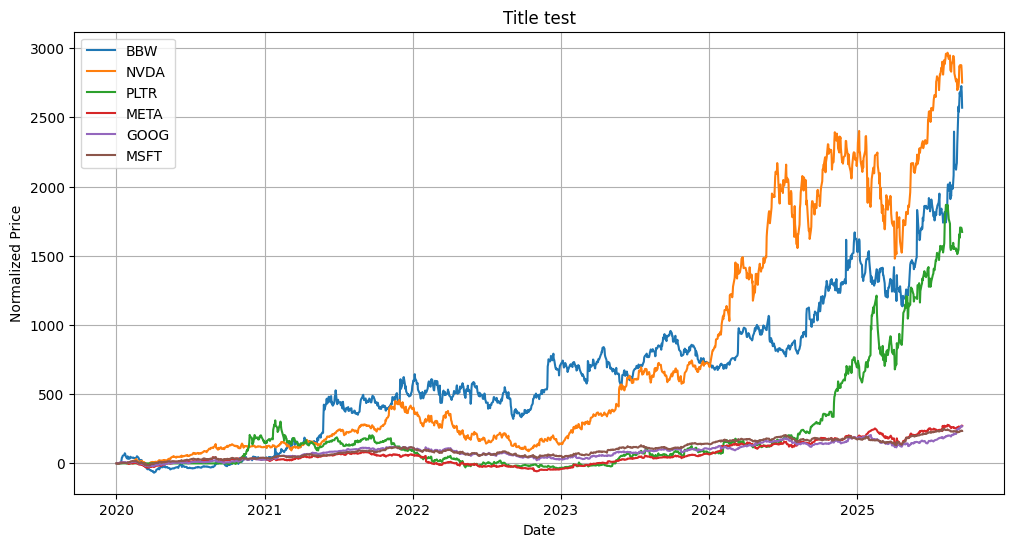

In [51]:
# Calculate daily returns
daily_returns = stock_data.pct_change().fillna(0)  # daily % change

# Convert to cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1  # cumulative % change

# Multiply by 100 to show in percentage
cumulative_returns_pct = cumulative_returns * 100

plt.figure(figsize=(12,6))
for ticker in tickers:
   plt.plot(cumulative_returns_pct[ticker], label = ticker)

print(stock_data.columns)

plt.title("Title test")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()
